# Spam Email classifier

### Import Libraries

In [9]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


### Load the dataset

In [2]:
df = pd.read_csv("email.csv")

### We split the dataset into Training and Test data

In [3]:
train_data = df[:80]
test_data = df[80:]

### Initialize CountVectorizer to convert text to numerical features

In [4]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(train_data['Message'].values)


### Initialize and train the Naive Bayes classifier

In [5]:
classifier = MultinomialNB()
targets = train_data['Category'].values
classifier.fit(counts, targets)

MultinomialNB()

### Transform test data and make predictions

In [7]:
examples = test_data['Message'].values
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)

### print messages and their predictions

In [10]:
results_df = pd.DataFrame({
    "Message": examples,
    "Actual": test_data['Category'].values,
    "Prediction": ["Spam" if pred == 1 else "Not Spam" for pred in predictions]
})

# Display the DataFrame
print(results_df.head(10))

                                             Message Actual Prediction
0                             Sorry, I'll call later    ham   Not Spam
1                    K. Did you call me just now ah?    ham   Not Spam
2                   Ok i am on the way to home hi hi    ham   Not Spam
3               You will be in the place of that man    ham   Not Spam
4                                     Yup next stop.    ham   Not Spam
5  I call you later, don't have network. If urgnt...    ham   Not Spam
6  For real when u getting on yo? I only need 2 m...    ham   Not Spam
7  Yes I started to send requests to make it but ...    ham   Not Spam
8         I'm really not up to it still tonight babe    ham   Not Spam
9          Ela kano.,il download, come wen ur free..    ham   Not Spam


### Calculate and display accuracy

In [11]:
test_targets = test_data['Category'].values
accuracy = accuracy_score(test_targets, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.63%


### Display confusion matrix

In [12]:
cm = confusion_matrix(test_targets, predictions)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[4684   76    0]
 [ 163  569    0]
 [   1    0    0]]


### Display classification report

In [13]:
print("\nClassification Report:")
print(classification_report(test_targets, predictions))


Classification Report:
                precision    recall  f1-score   support

           ham       0.97      0.98      0.98      4760
          spam       0.88      0.78      0.83       732
{"mode":"full"       0.00      0.00      0.00         1

      accuracy                           0.96      5493
     macro avg       0.62      0.59      0.60      5493
  weighted avg       0.95      0.96      0.96      5493



/home/moh/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moh/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/moh/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Display the confusion matrix as a plot

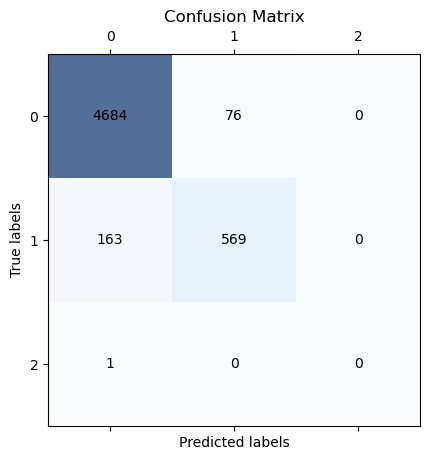

In [14]:
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()